<img src="https://img.ibxk.com.br/2014/10/programas/123551392.png">
<center>
<h1>
    Descobrindo as melhores notas de matemática do ENEM 2016
</h1>
</center>



Você deverá criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016.

## Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import BayesianRidge, HuberRegressor, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline
sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [2]:
from IPython.core.pylabtools import figsize
sns.set(figsize(20,7))
sns.set(font_scale=1.35)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Importação dos dados

In [3]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
model = test['NU_INSCRICAO']

<center>
<h1>
    Análise exploratória
</h1>
</center>

In [4]:
# verificando os dados de treino
train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.00,...,5.00,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.00,...,nan,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.00,...,nan,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.00,...,5.00,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.00,...,nan,A,A,A,A,A,A,A,A,A


In [5]:
train.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=167)

In [6]:
# verificando os dados de teste
test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.00,420.00,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.00,580.00,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.00,320.00,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,nan,nan,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.00,320.00,D,H,H,C,B,A,NaN,A


In [7]:
test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

### Verificando valores nulos

In [8]:
# treino
null_values = pd.DataFrame([train[test.columns].isna().sum(), train[test.columns].isna().sum()/len(train)*100]).T.round(2)
null_values.columns = ['qt', 'perc %']
null_values

,qt,perc %
NU_INSCRICAO,0.00,0.00
CO_UF_RESIDENCIA,0.00,0.00
SG_UF_RESIDENCIA,0.00,0.00
NU_IDADE,0.00,0.00
TP_SEXO,0.00,0.00
TP_COR_RACA,0.00,0.00
TP_NACIONALIDADE,0.00,0.00
TP_ST_CONCLUSAO,0.00,0.00
TP_ANO_CONCLUIU,0.00,0.00
TP_ESCOLA,0.00,0.00


In [9]:
# treino
null_values = pd.DataFrame([test[test.columns].isna().sum(), test[test.columns].isna().sum()/len(test)*100]).T.round(2)
null_values.columns = ['qt', 'perc %']
null_values

,qt,perc %
NU_INSCRICAO,0.00,0.00
CO_UF_RESIDENCIA,0.00,0.00
SG_UF_RESIDENCIA,0.00,0.00
NU_IDADE,0.00,0.00
TP_SEXO,0.00,0.00
TP_COR_RACA,0.00,0.00
TP_NACIONALIDADE,0.00,0.00
TP_ST_CONCLUSAO,0.00,0.00
TP_ANO_CONCLUIU,0.00,0.00
TP_ESCOLA,0.00,0.00


### Verificando a distribuição e correlação dos dados e presença de outlier

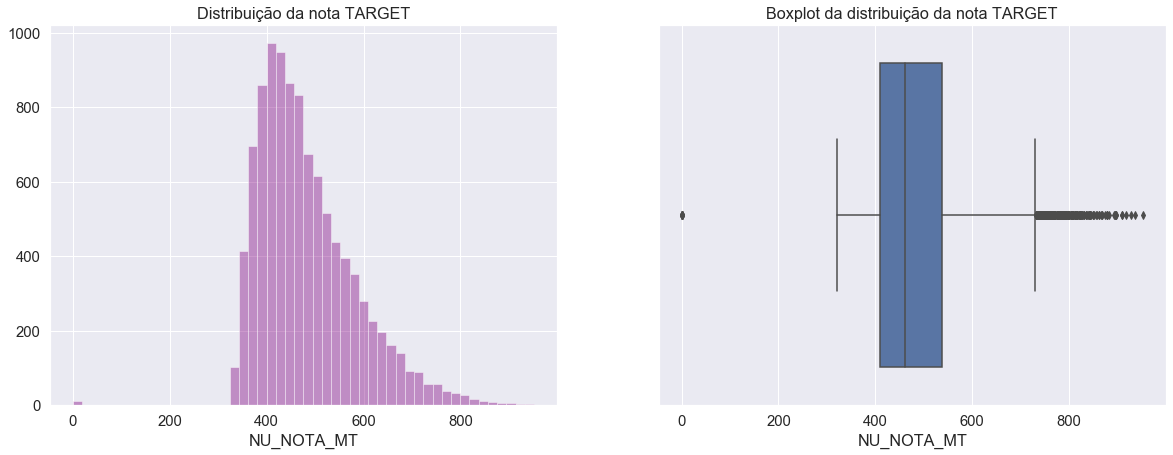

In [10]:
# verificando a distribuição e outliers no target (Nota de matemática)
fig, axes = plt.subplots(1, 2, sharex=True)
plot_data = train['NU_NOTA_MT']
g = sns.distplot(plot_data, kde=False, color='purple', ax=axes[0])
b = sns.boxplot(plot_data, ax=axes[1]);
g.set_title('Distribuição da nota TARGET')
b.set_title('Boxplot da distribuição da nota TARGET');

In [11]:
NU_NOTA_MT = train['NU_NOTA_MT']
q3 = NU_NOTA_MT.quantile(0.75)
print(f"{100-(len(train['NU_NOTA_MT'][train['NU_NOTA_MT'] <= q3]))/len(train)*100}% da base é outlier")
print(f"q3: {q3}")

44.646758922068464% da base é outlier
q3: 537.6


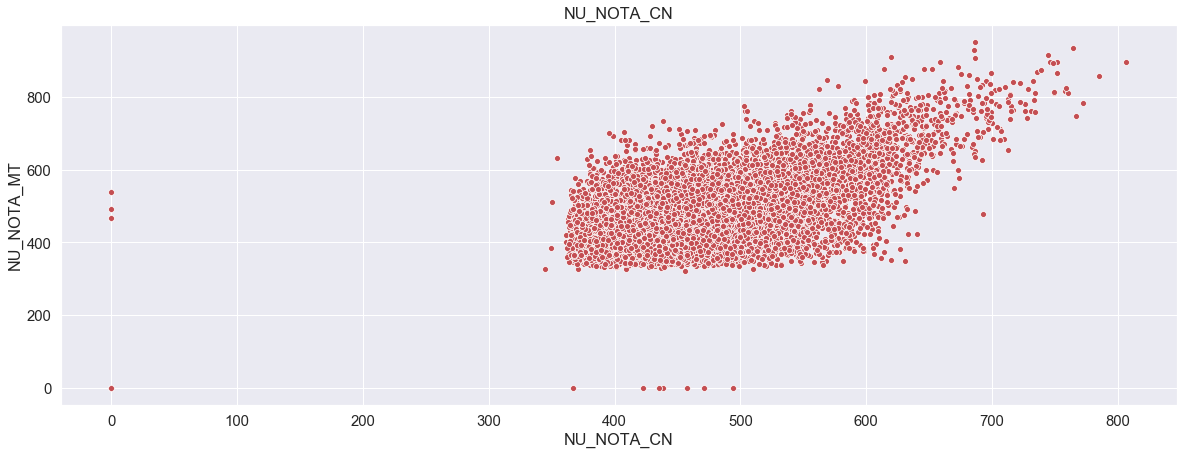

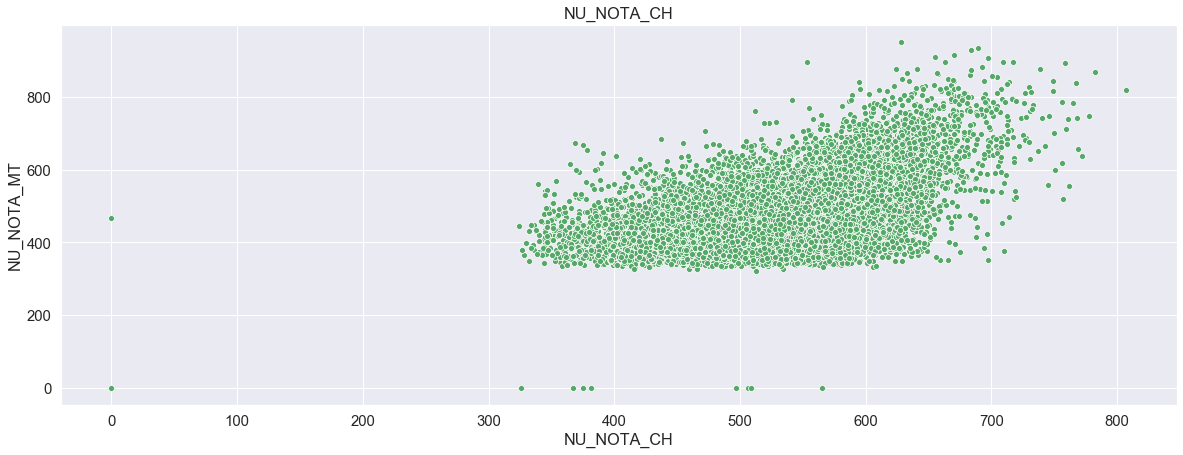

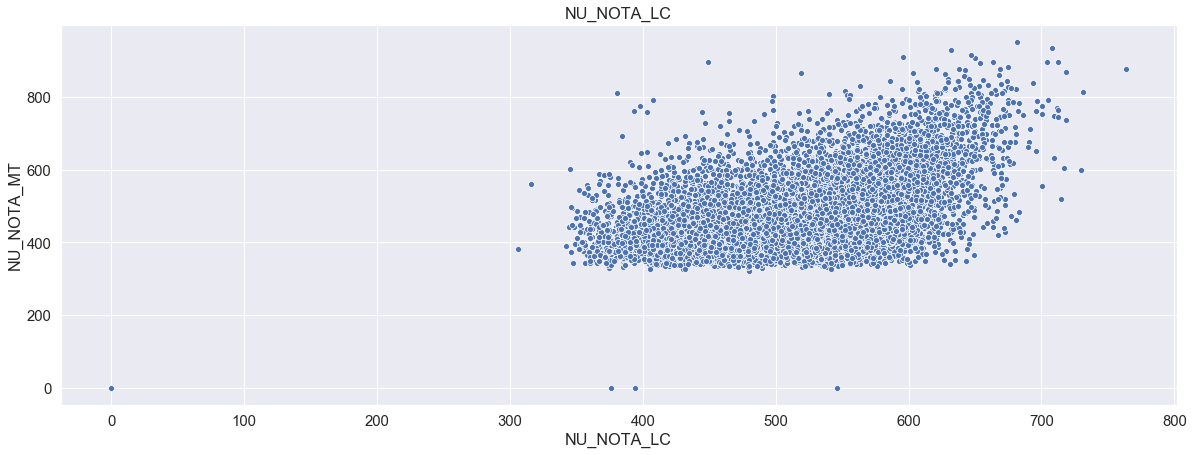

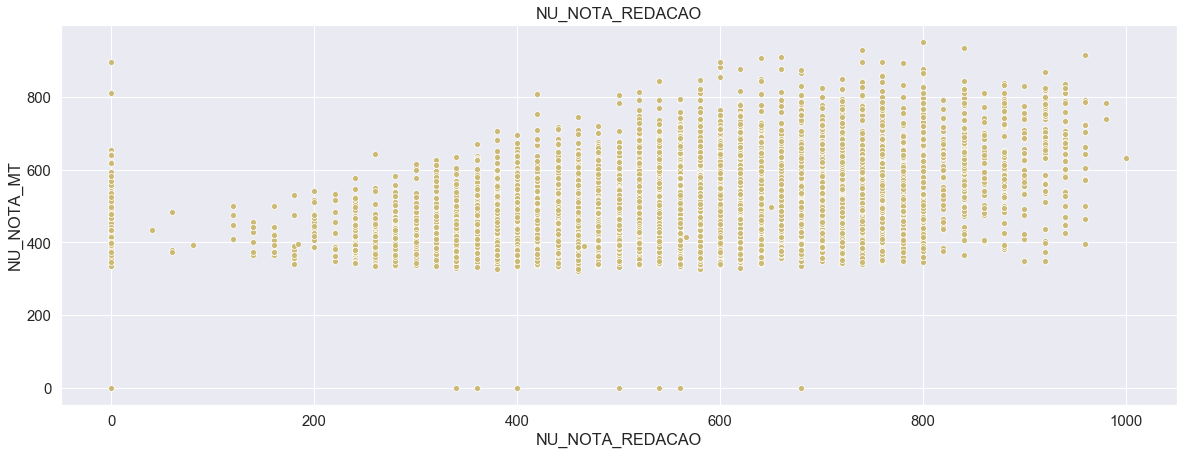

In [12]:
# verificando a distribuição das colunas de nota VS a nota de matemática
NU_NOTAS = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
colors = ['r', 'g', 'b', 'y']
i = 0
for nota_col in NU_NOTAS:
    g = sns.scatterplot(x=nota_col, y='NU_NOTA_MT', data=train, color=colors[i])
    g.set_title(nota_col)
    plt.show()
    i += 1

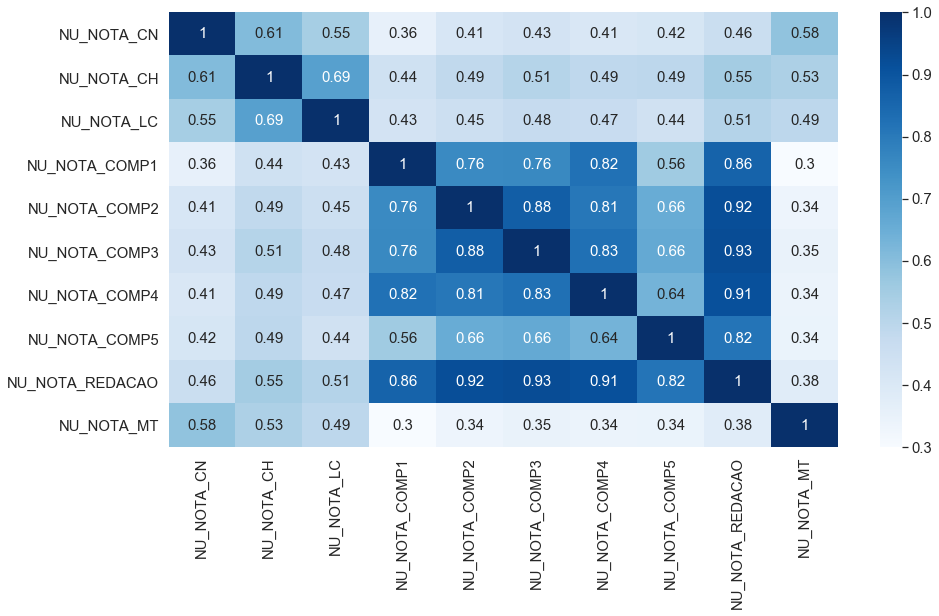

In [13]:
# criando matriz de correlação
NU_NOTAS = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 
            'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'NU_NOTA_MT'] 

corr = train[NU_NOTAS].corr()
plt.subplots(figsize = (15, 8))
sns.heatmap(corr, annot = True, annot_kws = {"size": 15}, cmap= 'Blues');

In [14]:
# verificando alguns dados estatísticos do dataframe
train[NU_NOTAS].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,NU_NOTA_MT
count,10341.00,10341.00,10133.00,10133.00,10133.00,10133.00,10133.00,10133.00,10133.00,10133.00
mean,473.50,529.66,516.47,119.81,111.92,106.82,113.12,77.37,529.05,482.50
std,71.09,73.73,68.69,29.85,33.74,34.34,33.48,43.07,154.29,99.83
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,419.90,480.40,468.10,120.00,100.00,80.00,100.00,40.00,440.00,408.90
50%,459.80,532.00,520.90,120.00,120.00,120.00,120.00,80.00,540.00,461.20
75%,514.50,581.20,564.90,140.00,120.00,120.00,120.00,100.00,600.00,537.60
max,806.40,807.00,763.60,200.00,200.00,200.00,200.00,200.00,1000.00,952.00


In [15]:
NU_NOTAS.remove('NU_NOTA_MT')
train[NU_NOTAS].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,10341.00,10341.00,10133.00,10133.00,10133.00,10133.00,10133.00,10133.00,10133.00
mean,473.50,529.66,516.47,119.81,111.92,106.82,113.12,77.37,529.05
std,71.09,73.73,68.69,29.85,33.74,34.34,33.48,43.07,154.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,419.90,480.40,468.10,120.00,100.00,80.00,100.00,40.00,440.00
50%,459.80,532.00,520.90,120.00,120.00,120.00,120.00,80.00,540.00
75%,514.50,581.20,564.90,140.00,120.00,120.00,120.00,100.00,600.00
max,806.40,807.00,763.60,200.00,200.00,200.00,200.00,200.00,1000.00


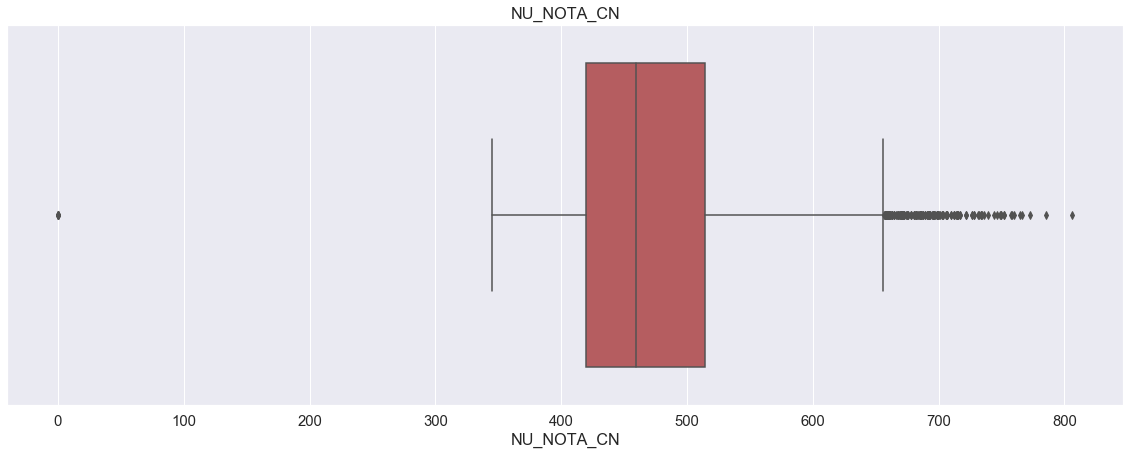

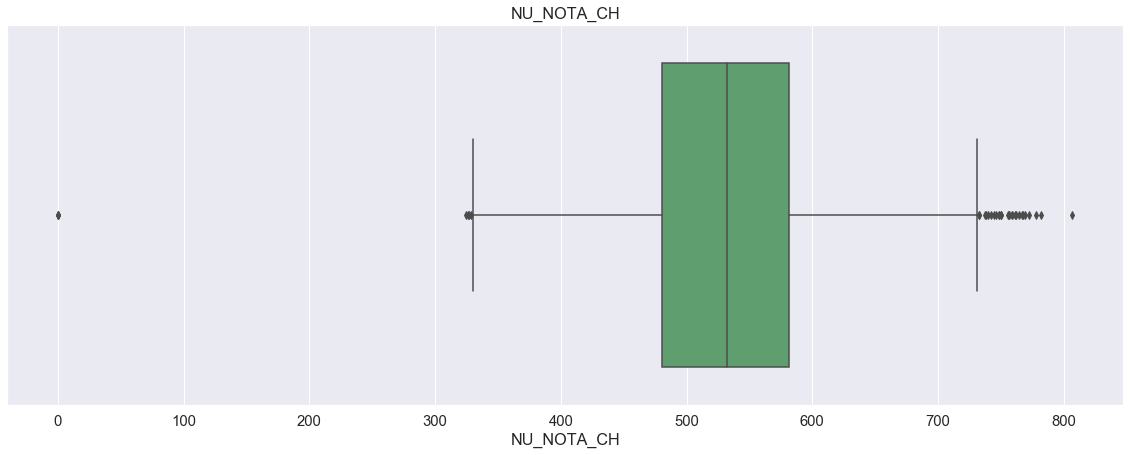

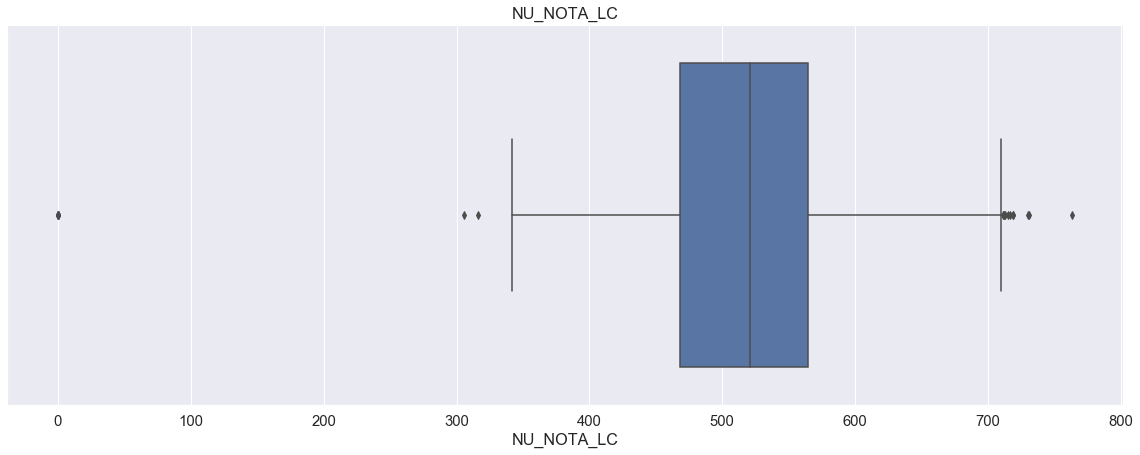

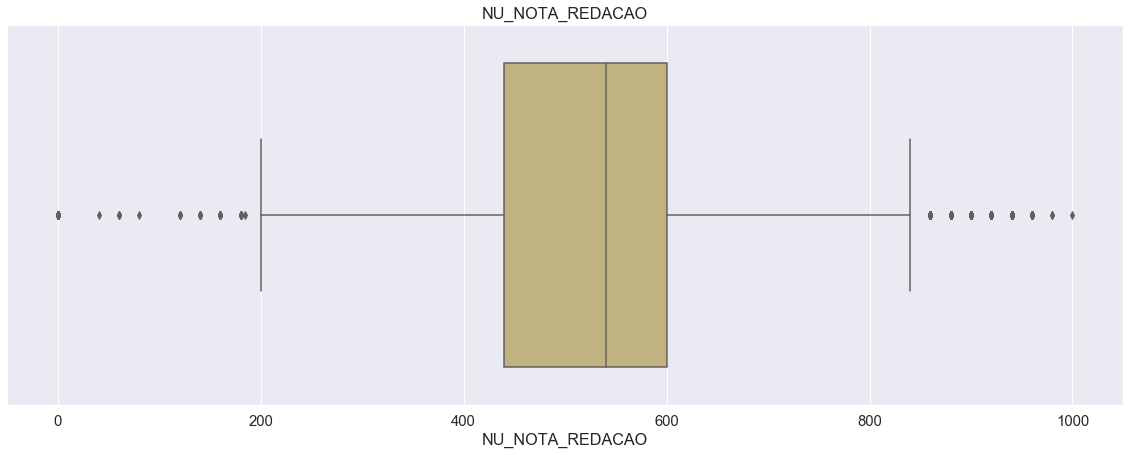

In [16]:
# verificando o boxplot pras notas por conta da variância observada no describe
NU_NOTAS = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
colors = ['r', 'g', 'b', 'y']
i = 0
for nota_col in NU_NOTAS:
    g = sns.boxplot(x=nota_col, data=train, color=colors[i])
    g.set_title(nota_col)
    plt.show()
    i += 1

<center>
<h1>
    Tratamento dos dados
</h1>
</center>

- Há mais colunas na base de treino que na de teste


- Há linhas que praticamente são nulas por inteiro, e acredito que preencher esses dados irá causar um grande viés, então vou inicialmente começar com um modelo bem simples, com o menor número de features (apenas as de notas, pois poderemos preenche-las com zero)


- Em um modelo de regressão, não é muito indicado ter uma feature que há grande correlação, pois o modelo pode considerar apenas ela importante, então iremos remover as colunas de composição da nota de redação (deixar apenas a de redação das colunas notas que correspondem a prova de redação), isto por que há um comportamento diferente, havendo gaps entre as notas. O que pode fazer nosso modelo definir algumas notas de "corte"


- Os dados não tem um comportamento muito linear, principalmente em relação a nota mínima. Há uma grande variância e presença de outliers. Então escolheremos modelos que trabalham com L1/L2 para obter um modelo mais robusto

### Selecionando as colunas para o modelo

In [17]:
train_features = ['NU_NOTA_CN',
                  'NU_NOTA_CH',
                  'NU_NOTA_LC',
                  #'NU_NOTA_COMP1',
                  #'NU_NOTA_COMP2',
                  #'NU_NOTA_COMP3', 
                  #'NU_NOTA_COMP4',
                  #'NU_NOTA_COMP5',
                  'NU_NOTA_REDACAO',
                  'NU_NOTA_MT'] 

test_features = ['NU_NOTA_CN',
                  'NU_NOTA_CH',
                  'NU_NOTA_LC',
                  'NU_NOTA_REDACAO']

### Preenchendo valores nulos com zero

In [18]:
train[train_features] = train[train_features].fillna(value=0)
test[test_features] = test[test_features].fillna(value=0)

In [19]:
print(train[train_features].isna().sum())
print('--------------------')
print(test[test_features].isna().sum())

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_MT         0
dtype: int64
--------------------
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
dtype: int64


### Feature engineering

In [20]:
train['SUM'] = train[test_features].sum(axis=1)
train['STD'] = train[test_features].std(axis=1)
train['MEAN'] = train[test_features].mean(axis=1)
train['MIN'] = train[test_features].min(axis=1)
train['MAX'] = train[test_features].max(axis=1)

test['SUM'] = test[test_features].sum(axis=1)
test['STD'] = test[test_features].std(axis=1)
test['MEAN'] = test[test_features].mean(axis=1)
test['MIN'] = test[test_features].min(axis=1)
test['MAX'] = test[test_features].max(axis=1)

In [21]:
add_features = ['SUM', 'STD', 'MEAN', 'MIN', 'MAX']
train_features.extend(add_features)
test_features.extend(add_features)

In [22]:
train[train_features].sample(5)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT,SUM,STD,MEAN,MIN,MAX
1009,524.10,547.60,552.80,600.00,401.20,2224.50,31.80,556.12,524.10,600.00
2810,467.40,390.70,430.70,440.00,453.80,1728.80,31.75,432.20,390.70,467.40
10217,416.60,532.10,452.50,460.00,499.60,1861.20,48.39,465.30,416.60,532.10
9685,406.40,400.40,491.20,440.00,343.00,1738.00,41.62,434.50,400.40,491.20
5860,457.50,503.90,376.80,680.00,401.60,2018.20,128.21,504.55,376.80,680.00


In [23]:
test[test_features].sample(5)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,SUM,STD,MEAN,MIN,MAX
1438,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1734,385.80,584.50,571.40,680.00,2221.70,123.01,555.42,385.80,680.00
871,556.40,589.70,574.60,560.00,2280.70,15.21,570.17,556.40,589.70
400,394.40,529.50,500.50,680.00,2104.40,117.89,526.10,394.40,680.00
1630,0.00,0.00,500.90,420.00,920.90,267.88,230.22,0.00,500.90


<center>
<h1>
    Criando o modelo
</h1>
</center>

In [24]:
X_train = train[test_features]
X_test = test[test_features]
y = train['NU_NOTA_MT']

## Vou utilizar 3 algoritmos:
- <b>LinearRegression</b>: Para base-line
- <b>HuberRegressor</b>: Um modelo mais robusto para outliers que utiliza L1/L2 de forma hibrida 
- <b>BayesianRidge</b>: Modelo baysiano que estima baseado em probabilidade, útil em dados mal distribuidos
- Pensei em utilizar o SVR por conta de ter poucos registros, mas é um modelo muito pesado e não se dará bem com os outliers, que tem uma boa composição na base (45%), então vamos testar apenas com os modelos acima e verificar o resultado antes de partir para outra abordagem

In [25]:
# criando os modelos e os hyperparameters
models = {
    'LinearRegression': LinearRegression(normalize=True),
    'HuberRegressor': HuberRegressor(max_iter=150, fit_intercept=True, alpha=0.0001, epsilon=1.35),
    'BayesianRidge': BayesianRidge(n_iter=300, tol=1e-3, alpha_1=1e-6, fit_intercept=True)
}

In [26]:
# treinamento
pred = {}
for name, model in models.items():
    model.fit(X_train, y)
    pred[name] = model.predict(X_test)
    print(f"{name} --> {model.score(X_train, y)}")

LinearRegression --> 0.9041560906579569
HuberRegressor --> 0.9022199307210013
BayesianRidge --> 0.904153881723405


In [27]:
# verificando os dados
pd.DataFrame(data=pred).describe().T

,count,mean,std,min,25%,50%,75%,max
LinearRegression,4576.00,354.74,216.81,-1.42,56.60,448.87,502.08,713.19
HuberRegressor,4576.00,349.39,214.81,-0.55,22.75,442.67,495.42,704.61
BayesianRidge,4576.00,354.74,216.79,-1.45,57.58,448.92,502.00,712.96


In [28]:
# a nota minima é zero e a máxima é 1000, aplicando a correção
for name, model in models.items():
    pred[name] = np.clip(pred[name], 0., 1000.)
pd.DataFrame(data=pred).describe().T

,count,mean,std,min,25%,50%,75%,max
LinearRegression,4576.00,355.08,216.24,0.00,56.60,448.87,502.08,713.19
HuberRegressor,4576.00,349.52,214.59,0.00,22.75,442.67,495.42,704.61
BayesianRidge,4576.00,355.09,216.21,0.00,57.58,448.92,502.00,712.96


Como não temos um target nos dados de teste (para sabermos o resultado é necessário subir na plataforma da codenation). Vamos utilizar os dados de treino apenas para ter uma referencia da aderencia do modelo

In [29]:
models

{'LinearRegression': LinearRegression(normalize=True),
 'HuberRegressor': HuberRegressor(max_iter=150),
 'BayesianRidge': BayesianRidge()}

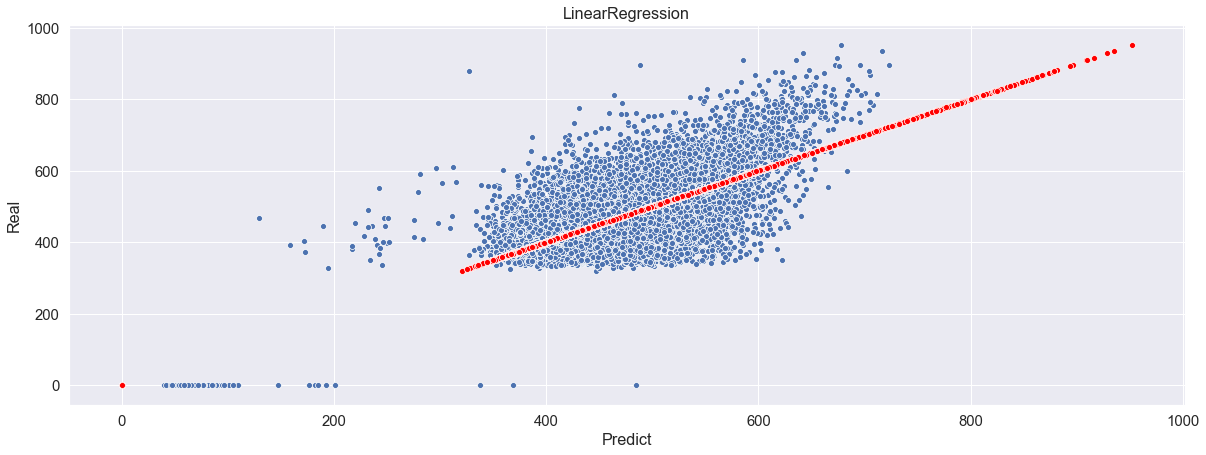

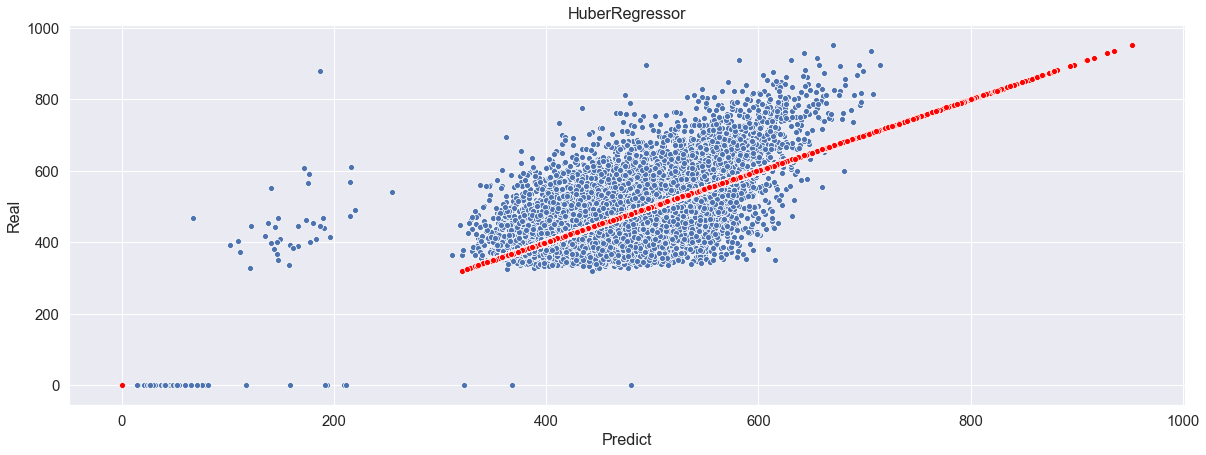

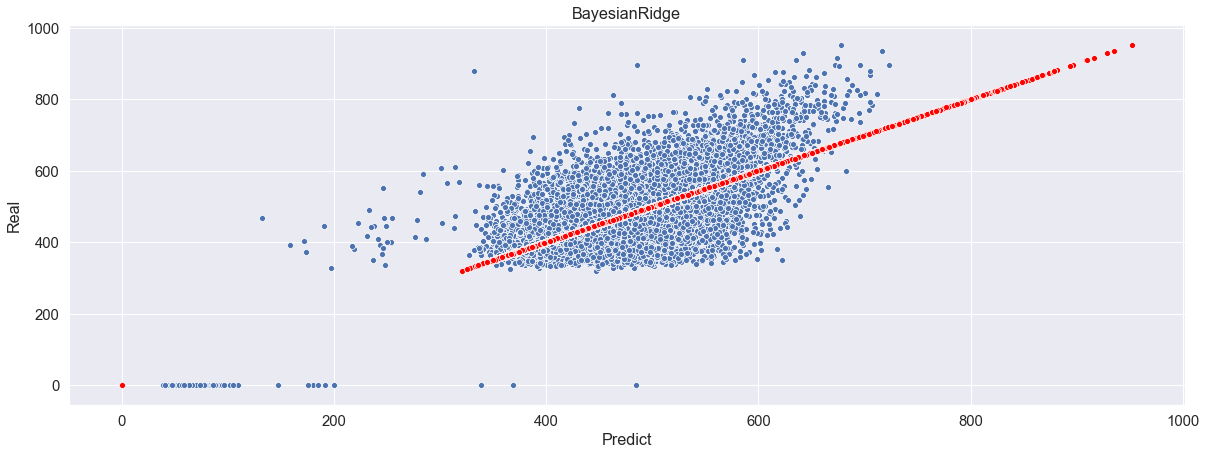

In [30]:
for name, model in models.items():
    test_model = np.clip(model.predict(X_train), 0., 1000.)      
    g = sns.scatterplot(x=test_model, y=y)
    g.set_xlabel('odsa')
    g.set_title(name)
    r = sns.scatterplot(x=y, y=y, color='red')
    r.set_xlabel('Predict')
    r.set_ylabel('Real')
    plt.show()

Pelos dados apresentados, o modelo não apresenta um bom fit em relação aos dados, porém para obtermos uma referência, vamos exportar o resultado e subir na plataforma da Codenation para termos uma referência de como os dados se adaptaram a base de teste.

In [31]:
# exportando os resultados
#result = pd.DataFrame([model, np.around(pred, 2)], index=['NU_INSCRICAO', 'NU_NOTA_MT']).T
#result.to_csv('answer.csv', index = False, header = True)

> <b>SCORE SUBMISSÃO CODENATION</b>
- LinearRegression: 92.72%
- HuberRegressor: 100%
- BayesianRidge: 100%

Code Review: https://www.codenation.dev/code-review/#/enem-2/hxqNmKiGg